In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn import metrics

# SVM classifier
from sklearn.svm import SVC
from sklearn import svm

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [2]:
data = pd.read_csv(r"C:\Users\prane\OneDrive\Desktop\Jupyter Notebook\Machine Learning ASE\Project\rideshare_kaggle.csv").sample(30000)
data.drop('id', axis=1, inplace=True)
data

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
664787,1.543753e+09,12,2,12,02-12-2018 12:13,America/New_York,Theatre District,South Station,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
528020,1.543857e+09,17,3,12,03-12-2018 17:13,America/New_York,Northeastern University,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.0004,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800
488499,1.543409e+09,12,28,11,28-11-2018 12:44,America/New_York,Beacon Hill,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.0000,1543420800,33.83,1543399200,42.61,1543438800,30.13,1543399200,36.60,1543438800
186991,1.544677e+09,4,13,12,13-12-2018 04:50,America/New_York,Fenway,North Station,Lyft,lyft_plus,...,0.0000,1544634000,22.55,1544673600,37.84,1544637600,17.99,1544673600,30.27,1544637600
152200,1.545137e+09,12,18,12,18-12-2018 12:50,America/New_York,Boston University,North Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266230,1.543328e+09,14,27,11,27-11-2018 14:12,America/New_York,Boston University,Theatre District,Lyft,lyft_luxsuv,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
542782,1.544872e+09,11,15,12,15-12-2018 11:10,America/New_York,Boston University,Theatre District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,0.0075,1544893200,39.78,1544929200,54.40,1544896800,36.64,1544929200,53.73,1544896800
315432,1.543421e+09,16,28,11,28-11-2018 16:01,America/New_York,Beacon Hill,Fenway,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
279308,1.543506e+09,15,29,11,29-11-2018 15:48,America/New_York,Haymarket Square,Beacon Hill,Lyft,lyft_luxsuv,...,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800


<span style="font-size: 22px; color: green; font-weight: bold">Data Preprocessing</span>

<span style="font-size: 16px; color: green; font-weight: bold">Data Inspection</span>

In [3]:
# To get number of rows and columns in the dataset
num_rows, num_columns = data.shape
num_rows, num_columns

(30000, 56)

In [4]:
# To find the number of missing values in each column
data.isnull().sum()

timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          2370
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                        0
temperatureHigh             

<span style="font-size: 16px; color: green; font-weight: bold">Handling missing values</span>

In [5]:
# To fill the missing values in the "price" attribute with the mean
mean_price = data['price'].mean()
data['price'].fillna(mean_price, inplace = True)

In [6]:
data.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

<span style="font-size: 16px; color: green; font-weight: bold">Discretizing the price attribute</span>

In [7]:
price_bins = [float('-inf'), 13, 26, float('inf')]
price_labels = ['low', 'medium', 'high']

In [8]:
data['price_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, include_lowest=True).astype(str)

In [9]:
data.shape

(30000, 57)

In [10]:
data['price_category']

664787       low
528020    medium
488499       low
186991    medium
152200       low
           ...  
266230      high
542782    medium
315432    medium
279308      high
434905       low
Name: price_category, Length: 30000, dtype: object

In [11]:
data.shape

(30000, 57)

<span style="font-size: 16px; color: green; font-weight: bold">Data Visualization</span>

In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon',
 'price_category']

In [13]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

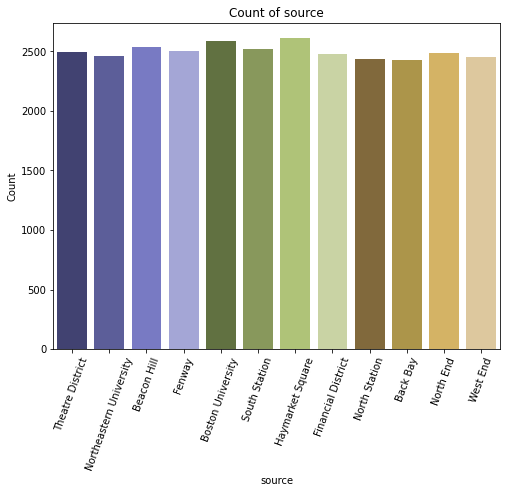

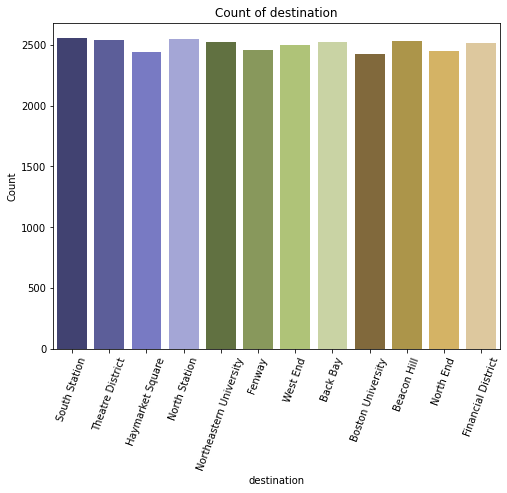

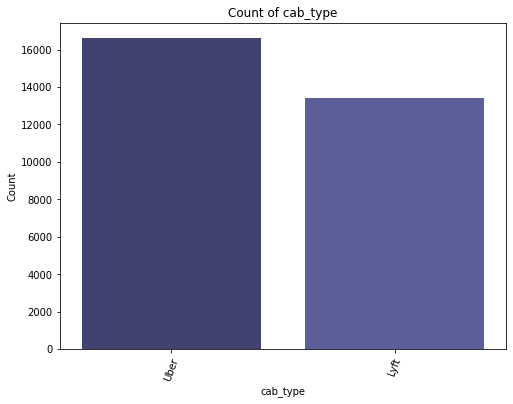

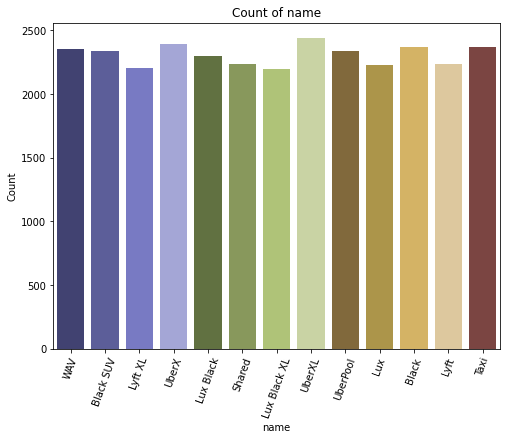

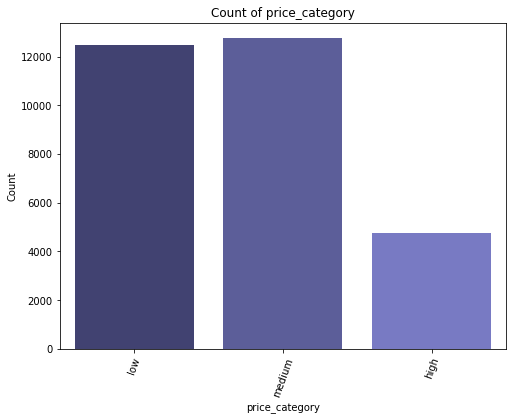

In [15]:
categorical_attributes = ['source', 'destination', 'cab_type', 'name', 'price_category']

for col in categorical_attributes:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    sns.set_palette('tab20b')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=70)
    plt.show()


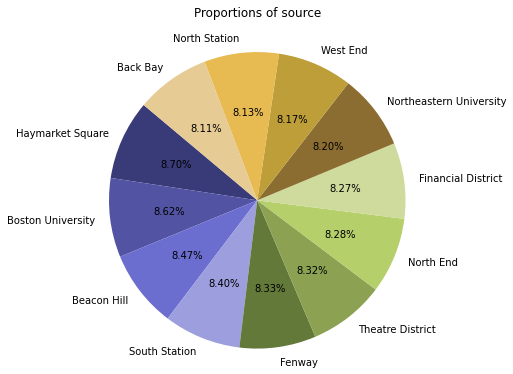

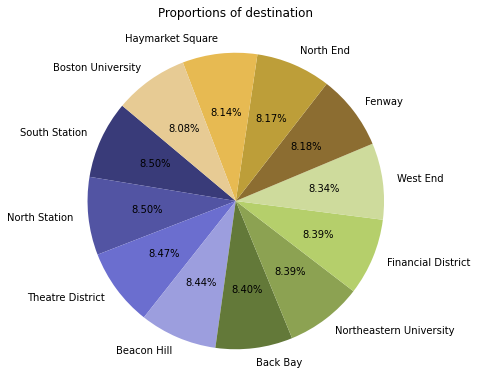

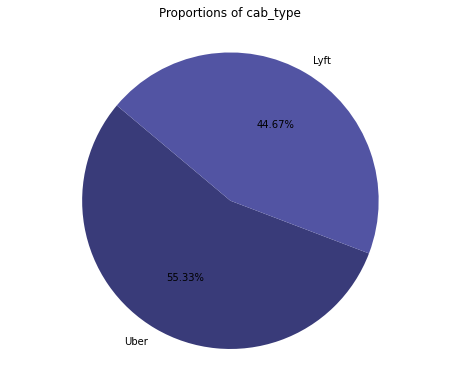

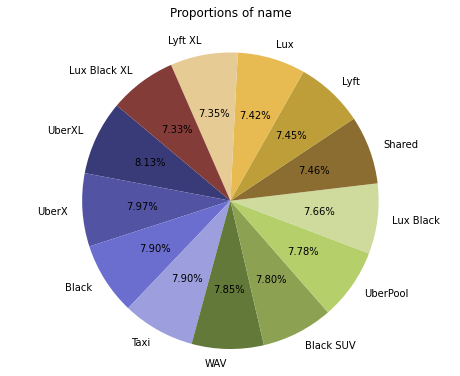

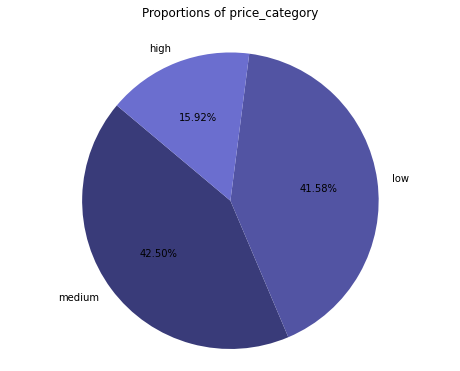

In [16]:
# Pie charts
for col in categorical_attributes:
    # Calculate value counts for each category
    counts = data[col].value_counts()

    plt.figure(figsize=(8, 6))
    plt.title(f'Proportions of {col}\n')
    sns.set_palette('tab20b')
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


<span style="font-size: 16px; color: green; font-weight: bold">Scaling numeric attributes</span>

In [17]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns = numeric_columns.drop('price_category', errors='ignore')

In [18]:
# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

In [19]:
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [20]:
data

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_category
664787,0.080798,0.521739,0.034483,1.0,02-12-2018 12:13,America/New_York,Theatre District,South Station,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.305606,0.753185,0.292174,0.709770,0.324125,0.850921,0.306306,0.749735,0.312734,low
528020,0.096160,0.739130,0.068966,1.0,03-12-2018 17:13,America/New_York,Northeastern University,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.347197,1.000000,0.373913,0.959770,0.357274,1.000000,0.380180,0.965310,0.346442,medium
488499,0.030222,0.521739,0.931034,0.0,28-11-2018 12:44,America/New_York,Beacon Hill,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.130199,0.662541,0.133913,0.373563,0.145488,0.648725,0.131532,0.270796,0.131086,low
186991,0.216728,0.173913,0.413793,1.0,13-12-2018 04:50,America/New_York,Fenway,North Station,Lyft,lyft_plus,...,0.739602,0.251911,0.749565,0.177750,0.758748,0.218839,0.769369,0.046726,0.754682,medium
152200,0.284530,0.521739,0.586207,1.0,18-12-2018 12:50,America/New_York,Boston University,North Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,1.000000,0.267565,1.000000,0.182266,1.000000,0.011331,1.000000,0.109027,1.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266230,0.018288,0.608696,0.896552,0.0,27-11-2018 14:12,America/New_York,Boston University,Theatre District,Lyft,lyft_luxsuv,...,0.088608,0.735712,0.123478,0.522578,0.084715,0.713173,0.120721,0.508673,0.069288,high
542782,0.245509,0.478261,0.482759,1.0,15-12-2018 11:10,America/New_York,Boston University,Theatre District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,0.869801,0.879141,0.873043,0.857553,0.891344,0.879249,0.897297,0.877168,0.889513,medium
315432,0.031964,0.695652,0.931034,0.0,28-11-2018 16:01,America/New_York,Beacon Hill,Fenway,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,...,0.130199,0.659629,0.133913,0.373153,0.145488,0.643059,0.131532,0.270088,0.131086,medium
279308,0.044558,0.652174,0.965517,0.0,29-11-2018 15:48,America/New_York,Haymarket Square,Beacon Hill,Lyft,lyft_luxsuv,...,0.175407,0.709501,0.206957,0.461823,0.182320,0.674221,0.207207,0.335929,0.168539,high


<span style="font-size: 16px; color: green; font-weight: bold">Data Encoding</span>

In [21]:
# To seperate the ordinal and nominal columns
ordinal_columns = ['price_category']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

In [22]:
# One-hot encoding nominal attributes
data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [23]:
# Label-encoding ordinal attributes
label_encoder = LabelEncoder()
for column in ordinal_columns:
    data_encoded[column] = label_encoder.fit_transform(data[column])

In [24]:
data_encoded

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
664787,0.080798,0.521739,0.034483,1.0,0.052941,0.071237,0.000000,0.895572,0.337017,0.581571,...,False,False,False,False,False,False,False,False,False,True
528020,0.096160,0.739130,0.068966,1.0,0.276471,0.258065,0.000000,0.896894,0.000000,0.931350,...,False,False,False,False,False,False,False,True,False,False
488499,0.030222,0.521739,0.931034,0.0,0.058824,0.192204,0.000000,0.951751,0.479282,0.459932,...,False,False,False,False,False,False,False,True,False,False
186991,0.216728,0.173913,0.413793,1.0,0.200000,0.438172,0.000000,0.895572,0.337017,0.111720,...,False,False,False,False,True,False,False,False,False,False
152200,0.284530,0.521739,0.586207,1.0,0.100000,0.452957,0.000000,0.846662,0.070442,0.148786,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266230,0.018288,0.608696,0.896552,0.0,0.505882,0.392473,0.166667,0.846662,0.070442,0.602976,...,False,False,False,False,False,True,False,False,False,False
542782,0.245509,0.478261,0.482759,1.0,0.164466,0.326613,0.000000,0.990747,0.707182,0.742104,...,False,False,False,False,False,True,False,False,False,False
315432,0.031964,0.695652,0.931034,0.0,0.235294,0.309140,0.000000,1.000000,0.584254,0.580788,...,False,False,False,False,False,False,False,True,False,False
279308,0.044558,0.652174,0.965517,0.0,0.294118,0.178763,0.000000,0.906147,0.694751,0.628818,...,False,False,False,False,False,False,False,True,False,False


In [25]:
data_encoded['price_category']

664787    1
528020    2
488499    1
186991    2
152200    1
         ..
266230    0
542782    2
315432    2
279308    0
434905    1
Name: price_category, Length: 30000, dtype: int32

<span style="font-size: 16px; color: green; font-weight: bold">Handling the Outliers</span>

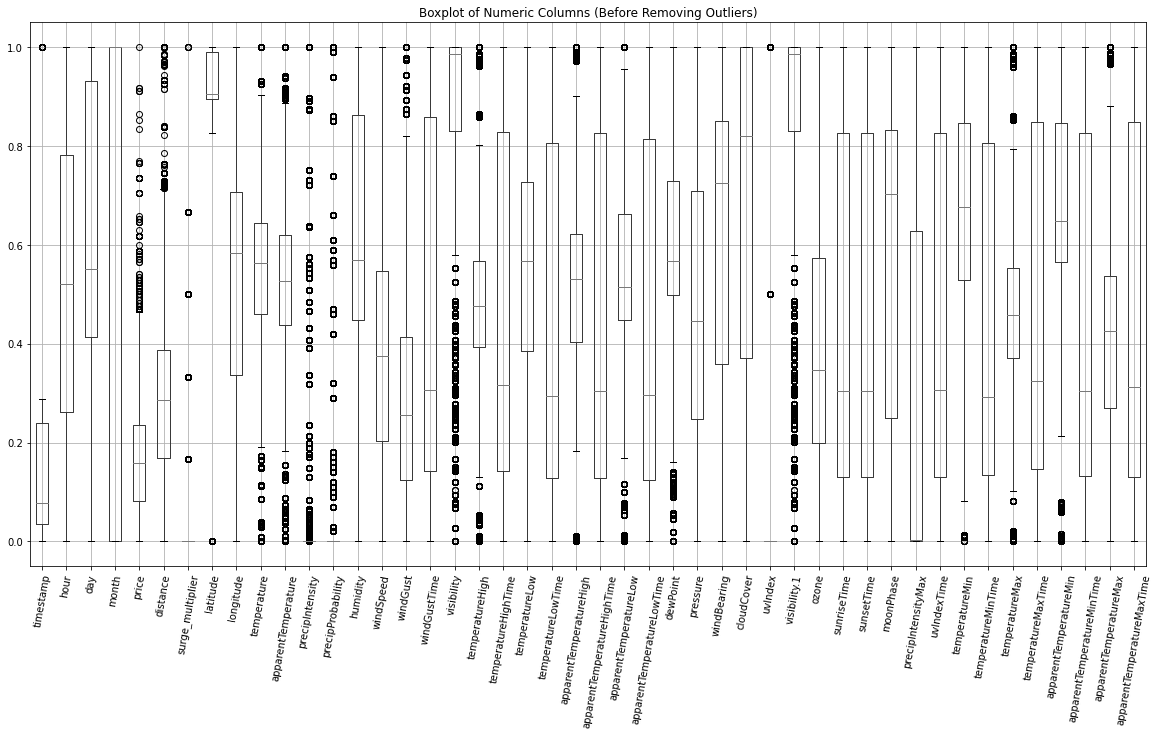

In [26]:
# Boxplots before removing outliers
plt.figure(figsize=(20,10))
data_encoded[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (Before Removing Outliers)')
plt.xticks(rotation=80)
plt.show()

In [27]:
# Removing outliers using the z-score method
data_encoded_no_outliers = data_encoded[(np.abs(stats.zscore(data_encoded[numeric_columns])) < 3).all(axis=1)]

print("Original Dataset Shape:", data_encoded.shape)
print("Dataset Shape After Removing Outliers:", data_encoded_no_outliers.shape)

Original Dataset Shape: (30000, 5860)
Dataset Shape After Removing Outliers: (26663, 5860)


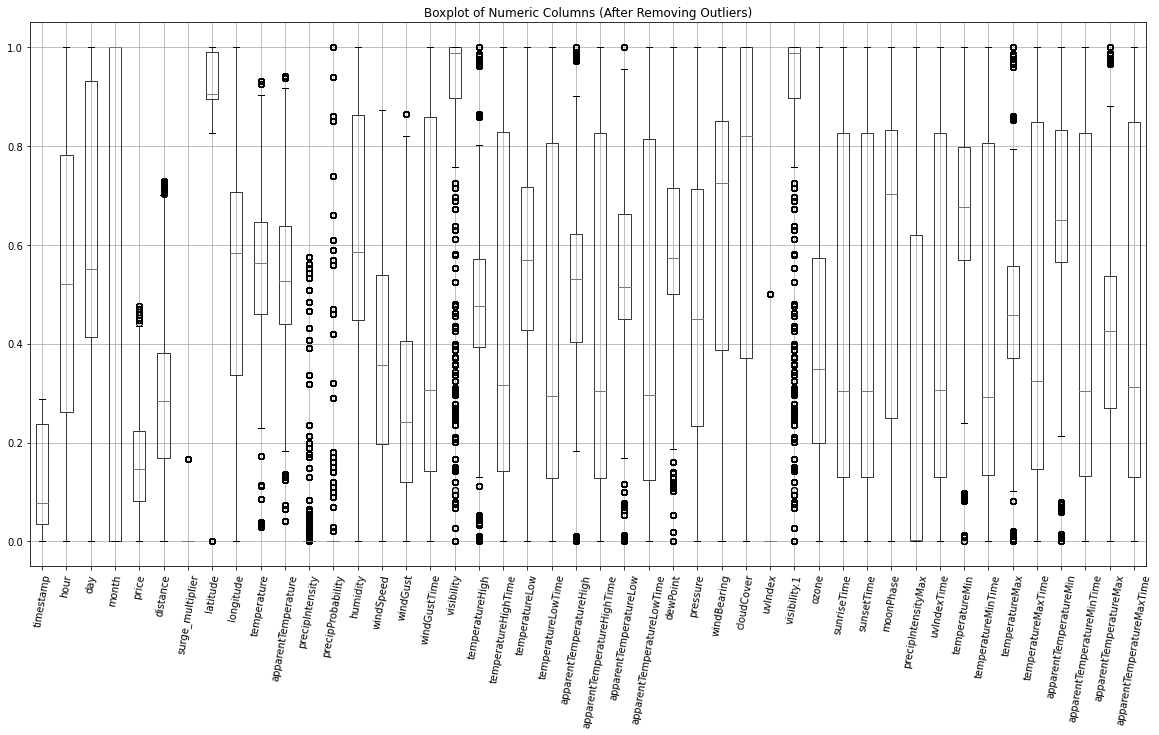

In [28]:
# Boxplots after removing outliers
plt.figure(figsize=(20,10))
data_encoded_no_outliers[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=80)
plt.show()

<span style="font-size: 16px; color: green; font-weight: bold">Data Split(for classifiers)</span>

In [29]:
X = data_encoded_no_outliers.drop('price_category', axis=1)
y = data_encoded_no_outliers['price_category']

In [30]:
# Splitting the data into training and testing (7:3 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (18664, 5859) (18664,)
Testing set shape: (7999, 5859) (7999,)


<span style="font-size: 16px; color: green; font-weight: bold">Data Split(for regressors)</span>

In [48]:
X_reg = data_encoded_no_outliers.drop('price', axis=1)
y_reg = data_encoded_no_outliers['price']

In [49]:
# Splitting the data into training and testing (7:3 ratio)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [50]:
print("Training set shape:", X_reg_train.shape, y_reg_train.shape)
print("Testing set shape:", X_reg_test.shape, y_reg_test.shape)

Training set shape: (18664, 5859) (18664,)
Testing set shape: (7999, 5859) (7999,)


<span style="font-size: 22px; color: green; font-weight: bold">Model Training</span>

<span style="font-size: 18px; color: green; font-weight: bold">Suppoer Vector Machine</span>

<span style="font-size: 16px; color: green; font-weight: bold">Linear Kernel</span>

In [31]:
# Initializing the SVM classifier
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear

SVC(kernel='linear', random_state=42)

In [32]:
# Fit the classifier on the training data
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [33]:
# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)

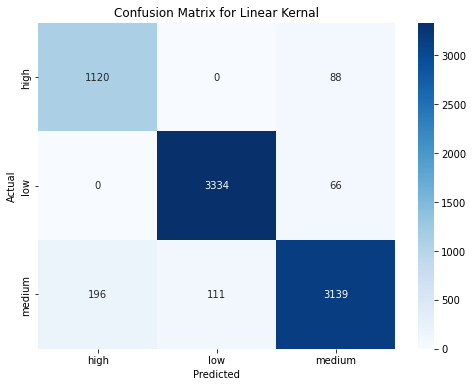

In [34]:
#To print the confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernal')
plt.show()

In [35]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_linear))
precision_linear, recall_linear, fscore_linear, _ = precision_recall_fscore_support(y_test, y_pred_linear, average='weighted')
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1 Score:", fscore_linear)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))


Accuracy Score: 0.9427613608145021
Precision: 0.9440501435515866
Recall: 0.9427613608145021
F1 Score: 0.9429382525994325

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1208
           1       0.97      0.98      0.97      3400
           2       0.95      0.91      0.93      3446

    accuracy                           0.94      8054
   macro avg       0.92      0.94      0.93      8054
weighted avg       0.94      0.94      0.94      8054



<span style="font-size: 16px; color: green; font-weight: bold">Polynomial Kernel</span>

In [36]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly

SVC(kernel='poly', random_state=42)

In [37]:
# Fit the classifier on the training data
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [38]:
# Predict on the test set
y_pred_poly = svm_poly.predict(X_test)

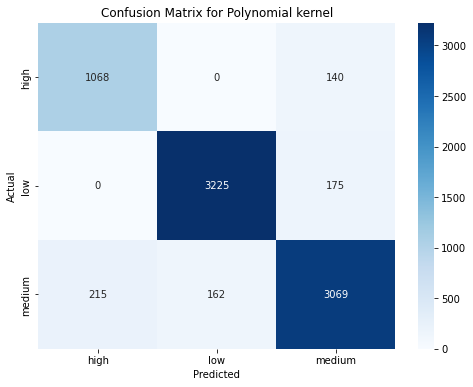

In [39]:
#To print the confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Polynomial kernel')
plt.show()

In [40]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_poly))
precision_poly, recall_poly, fscore_poly, _ = precision_recall_fscore_support(y_test, y_pred_poly, average='weighted')
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", fscore_poly)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly))


Accuracy Score: 0.9140799602681897
Precision: 0.9148466766504375
Recall: 0.9140799602681897
F1 Score: 0.9143134642032293

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1208
           1       0.95      0.95      0.95      3400
           2       0.91      0.89      0.90      3446

    accuracy                           0.91      8054
   macro avg       0.90      0.91      0.90      8054
weighted avg       0.91      0.91      0.91      8054



<span style="font-size: 16px; color: green; font-weight: bold">RBF Kernel</span>

In [41]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf

SVC(random_state=42)

In [42]:
# Fit the classifier on the training data
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [43]:
# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)

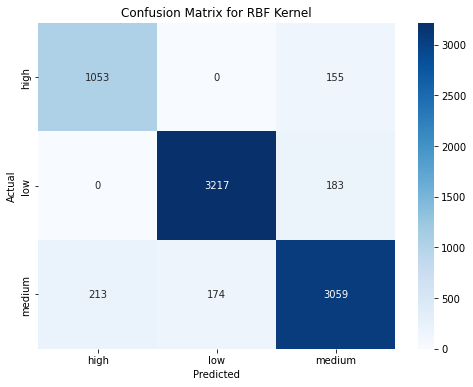

In [44]:
#To print the confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel')
plt.show()

In [45]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rbf))
precision_rbf, recall_rbf, fscore_rbf, _ = precision_recall_fscore_support(y_test, y_pred_rbf, average='weighted')
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", fscore_rbf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))


Accuracy Score: 0.9099826173330022
Precision: 0.9105315377204227
Recall: 0.9099826173330022
F1 Score: 0.9101665483902712

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1208
           1       0.95      0.95      0.95      3400
           2       0.90      0.89      0.89      3446

    accuracy                           0.91      8054
   macro avg       0.89      0.90      0.90      8054
weighted avg       0.91      0.91      0.91      8054



<span style="font-size: 16px; color: green; font-weight: bold">Sigmoid Kernel</span>

In [46]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid

SVC(kernel='sigmoid', random_state=42)

In [47]:
# Fit the classifier on the training data
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [48]:
# Predict on the test set
y_pred_sigmoid = svm_sigmoid.predict(X_test)

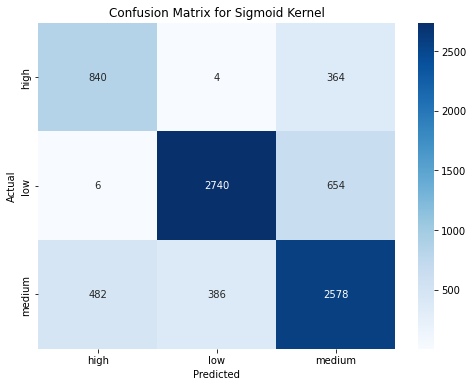

In [49]:
#To print the confusion matrix
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sigmoid Kernel')
plt.show()

In [50]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_sigmoid))
precision_sigmoid, recall_sigmoid, fscore_sigmoid, _ = precision_recall_fscore_support(y_test, y_pred_sigmoid, average='weighted')
print("Precision:", precision_sigmoid)
print("Recall:", recall_sigmoid)
print("F1 Score:", fscore_sigmoid)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))


Accuracy Score: 0.76458902408741
Precision: 0.7711594315543839
Recall: 0.76458902408741
F1 Score: 0.7669023448249996

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66      1208
           1       0.88      0.81      0.84      3400
           2       0.72      0.75      0.73      3446

    accuracy                           0.76      8054
   macro avg       0.74      0.75      0.74      8054
weighted avg       0.77      0.76      0.77      8054



<span style="font-size: 18px; color: green; font-weight: bold">Naive Bayes</span>

<span style="font-size: 16px; color: green; font-weight: bold">Gaussian Naive Bayes (GNB)</span>

In [32]:
# Initializing Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [33]:
# Fit the classifier on the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
# Predict on the test data
y_pred_gnb = gnb.predict(X_test)

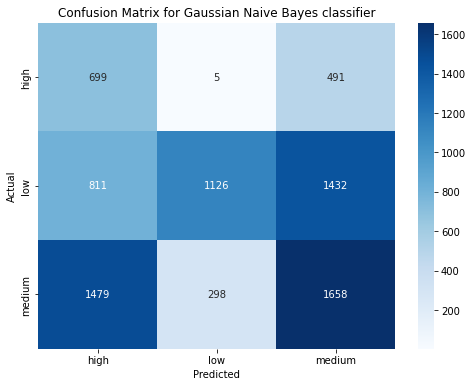

In [35]:
# To print the confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes classifier')
plt.show()

In [36]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_gnb))
precision_gnb, recall_gnb, fscore_gnb, _ = precision_recall_fscore_support(y_test, y_pred_gnb, average='weighted')
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1 Score:", fscore_gnb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))


Accuracy Score: 0.4354294286785848
Precision: 0.5656346059512688
Recall: 0.4354294286785848
F1 Score: 0.4505643779951977

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.58      0.33      1195
           1       0.79      0.33      0.47      3369
           2       0.46      0.48      0.47      3435

    accuracy                           0.44      7999
   macro avg       0.49      0.47      0.43      7999
weighted avg       0.57      0.44      0.45      7999



<span style="font-size: 16px; color: green; font-weight: bold">Multinomial Naive Bayes (MNB)</span>

In [37]:
# Initializing Multinomial Naive Bayes classifier
mnb = MultinomialNB()

In [38]:
# Fit the classifier on the training data
mnb.fit(X_train, y_train)

MultinomialNB()

In [39]:
# Predict on the test data
y_pred_mnb = mnb.predict(X_test)

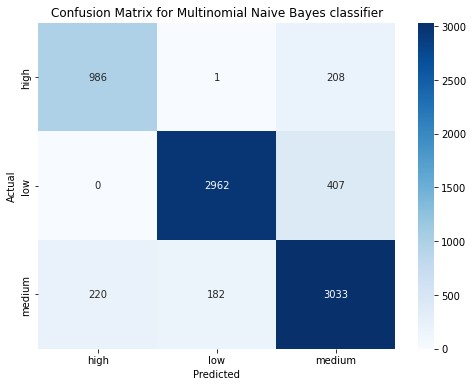

In [40]:
# To print the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes classifier')
plt.show()

In [41]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_mnb))
precision_mnb, recall_mnb, fscore_mnb, _ = precision_recall_fscore_support(y_test, y_pred_mnb, average='weighted')
print("Precision:", precision_mnb)
print("Recall:", recall_mnb)
print("F1 Score:", fscore_mnb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))


Accuracy Score: 0.8727340917614702
Precision: 0.8758446466241884
Recall: 0.8727340917614702
F1 Score: 0.8735004406405089

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1195
           1       0.94      0.88      0.91      3369
           2       0.83      0.88      0.86      3435

    accuracy                           0.87      7999
   macro avg       0.86      0.86      0.86      7999
weighted avg       0.88      0.87      0.87      7999



<span style="font-size: 16px; color: green; font-weight: bold">Bernoulli Naive Bayes (BNB)</span>

In [42]:
# Initializing Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

In [43]:
# Fit the classifier on the training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [44]:
# Predict on the test data
y_pred_bnb = bnb.predict(X_test)

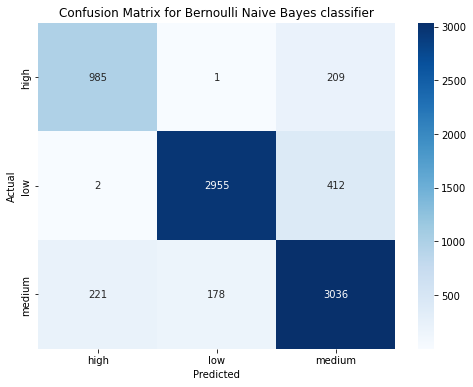

In [45]:
# To print the confusion matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bernoulli Naive Bayes classifier')
plt.show()

In [46]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_bnb))
precision_bnb, recall_bnb, fscore_bnb, _ = precision_recall_fscore_support(y_test, y_pred_bnb, average='weighted')
print("Precision:", precision_bnb)
print("Recall:", recall_bnb)
print("F1 Score:", fscore_bnb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bnb))


Accuracy Score: 0.8721090136267033
Precision: 0.8754439059157396
Recall: 0.8721090136267033
F1 Score: 0.8729117441093668

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1195
           1       0.94      0.88      0.91      3369
           2       0.83      0.88      0.86      3435

    accuracy                           0.87      7999
   macro avg       0.86      0.86      0.86      7999
weighted avg       0.88      0.87      0.87      7999

